In [1]:
%pylab inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import Quandl
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.api import abline_plot
import patsy
import seaborn as sns
sns.set(context='notebook', style='whitegrid', palette='deep', font='sans-serif', font_scale=1, rc=None)
import urllib2 as url
import statsmodels.api as sm
import statsmodels.formula.api as smf
from __future__ import print_function, division


import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns; sns.set() # you can comment out this line if you don't
# have seaborn installed; it just serves to make some of the plots prettier
#from sklearn.decomposition import PCA
#from sklearn.decomposition import KernelPCA
#from sklearn.decomposition import SparsePCA
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (20.0, 5.0)

Populating the interactive namespace from numpy and matplotlib


In [3]:
data = pd.read_csv("Lung Cancer Pivot.csv")
data.head()

,Row Labels,2001-2005,2002-2006,2003-2007,2004-2008,2006-2010,2007-2011,2009PM25,2010PM2.5,2011PM2.5,2009NO2,2010NO2,2011NO2,M_PM25,M_NO2
0,Kingsbridge - Riverdale,48.7,47.8,52.0,55.3,55.2,54.5,11.03,10.09,10.65,23.20,20.13,20.79,10.590000,21.373333
1,Northeast Bronx,48.6,47.8,48.4,47.0,44.7,43.9,10.68,9.65,10.48,22.39,20.21,21.06,10.270000,21.220000
2,Fordham - Bronx Pk,53.0,53.1,53.9,53.6,50.4,49.5,11.10,10.26,10.77,24.82,22.06,22.61,10.710000,23.163333
3,Pelham - Throgs Neck,56.9,58.4,60.0,59.7,58.4,58.1,10.59,9.68,10.50,22.83,21.04,21.61,10.256667,21.826667
4,Crotona -Tremont,54.5,54.6,53.5,54.1,55.9,53.2,11.76,10.99,11.45,28.07,25.25,25.57,11.400000,26.296667


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42 entries, 0 to 41
Data columns (total 15 columns):
Row Labels    42 non-null object
2001-2005     42 non-null float64
2002-2006     42 non-null float64
2003-2007     42 non-null float64
2004-2008     42 non-null float64
2006-2010     42 non-null float64
2007-2011     42 non-null float64
2009PM25      42 non-null float64
2010PM2.5     42 non-null float64
2011PM2.5     42 non-null float64
2009NO2       42 non-null float64
2010NO2       42 non-null float64
2011NO2       42 non-null float64
M_PM25        42 non-null float64
M_NO2         42 non-null float64
dtypes: float64(14), object(1)
memory usage: 5.2+ KB


In [49]:
newdata = data.rename(columns={'2007-2011':'Lung07_11','2009PM25':'PM09',
                               '2011PM2.5':'PM11','2010PM2.5':'PM10','2009NO2':'NO209',
                              '2010NO2':'NO210','2011NO2':'NO211'})
#newdata

In [48]:
mod = smf.ols('Lung07_11 ~ PM09  + PM10 + PM11', data = newdata).fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:              Lung07_11   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                 -0.033
Method:                 Least Squares   F-statistic:                    0.5669
Date:                Sat, 12 Mar 2016   Prob (F-statistic):              0.640
Time:                        12:06:30   Log-Likelihood:                -144.64
No. Observations:                  42   AIC:                             297.3
Df Residuals:                      38   BIC:                             304.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     60.3870     15.209      3.971      0.0

In [50]:
mod2 = smf.ols('Lung07_11 ~ NO209 + NO210 + NO211', data = newdata).fit()
print(mod2.summary())

                            OLS Regression Results                            
Dep. Variable:              Lung07_11   R-squared:                       0.188
Model:                            OLS   Adj. R-squared:                  0.124
Method:                 Least Squares   F-statistic:                     2.926
Date:                Sat, 12 Mar 2016   Prob (F-statistic):             0.0460
Time:                        12:09:53   Log-Likelihood:                -141.20
No. Observations:                  42   AIC:                             290.4
Df Residuals:                      38   BIC:                             297.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     59.5848      7.032      8.473      0.0

In [52]:
mod3 = smf.ols('Lung07_11 ~ M_PM25', data = newdata).fit()
print(mod3.summary())

                            OLS Regression Results                            
Dep. Variable:              Lung07_11   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.024
Method:                 Least Squares   F-statistic:                   0.03923
Date:                Sat, 12 Mar 2016   Prob (F-statistic):              0.844
Time:                        12:10:45   Log-Likelihood:                -145.54
No. Observations:                  42   AIC:                             295.1
Df Residuals:                      40   BIC:                             298.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     53.2224     10.892      4.886      0.0

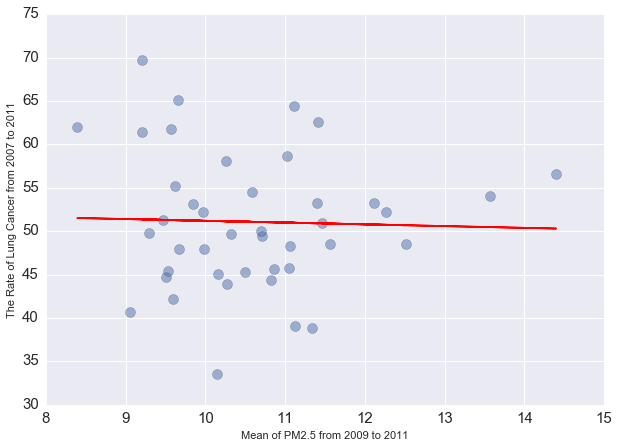

In [54]:
newdata[['M_PM25', 'Lung07_11']].plot(kind='scatter', x='M_PM25', y='Lung07_11',marker='o', s=100, 
                                    alpha=0.5,figsize=(10,7), fontsize=15)
plt.xlabel('Mean of PM2.5 from 2009 to 2011') 
plt.ylabel('The Rate of Lung Cancer from 2007 to 2011') 
#plt.xlim(-1500, 5100000)
#plt.ylim(-5, 30)
plot(newdata['M_PM25'],mod3.predict(), color = 'r')

In [56]:
mod4 = smf.ols('Lung07_11 ~ M_NO2', data = newdata).fit()
print(mod4.summary())

                            OLS Regression Results                            
Dep. Variable:              Lung07_11   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.5753
Date:                Sat, 12 Mar 2016   Prob (F-statistic):              0.453
Time:                        12:19:59   Log-Likelihood:                -145.26
No. Observations:                  42   AIC:                             294.5
Df Residuals:                      40   BIC:                             298.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     55.1708      5.531      9.976      0.0

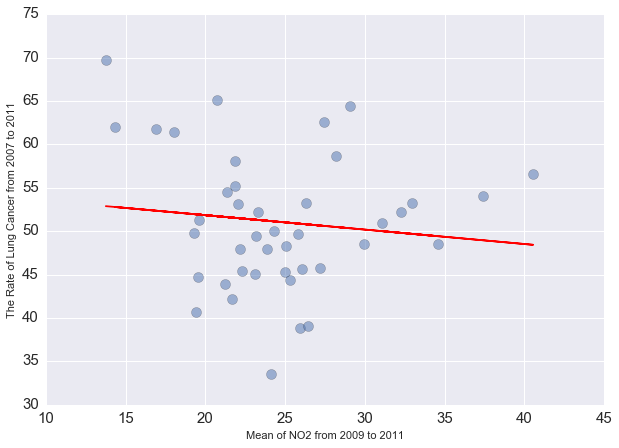

In [57]:
newdata[['M_NO2', 'Lung07_11']].plot(kind='scatter', x='M_NO2', y='Lung07_11',marker='o', s=100, 
                                    alpha=0.5,figsize=(10,7), fontsize=15)
plt.xlabel('Mean of NO2 from 2009 to 2011') 
plt.ylabel('The Rate of Lung Cancer from 2007 to 2011') 
#plt.xlim(-1500, 5100000)
#plt.ylim(-5, 30)
plot(newdata['M_NO2'],mod4.predict(), color = 'r')